### Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,0,1,2,3,4,5,6,7,8
0,1,3,5,7,9,11,13,15,17
1,3,5,7,9,11,13,15,17,19
2,5,7,9,11,13,15,17,19,21
3,7,9,11,13,15,17,19,21,23
4,9,11,13,15,17,19,21,23,25
...,...,...,...,...,...,...,...,...,...
94,189,191,193,195,197,199,201,203,205
95,191,193,195,197,199,201,203,205,207
96,193,195,197,199,201,203,205,207,209
97,195,197,199,201,203,205,207,209,211


In [4]:
X=df.iloc[:,:8]
X.head()

,0,1,2,3,4,5,6,7
0,1,3,5,7,9,11,13,15
1,3,5,7,9,11,13,15,17
2,5,7,9,11,13,15,17,19
3,7,9,11,13,15,17,19,21
4,9,11,13,15,17,19,21,23


In [5]:
y=df.iloc[:,8]
y.head()

0    17
1    19
2    21
3    23
4    25
Name: 8, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       99 non-null     int64
 1   1       99 non-null     int64
 2   2       99 non-null     int64
 3   3       99 non-null     int64
 4   4       99 non-null     int64
 5   5       99 non-null     int64
 6   6       99 non-null     int64
 7   7       99 non-null     int64
 8   8       99 non-null     int64
dtypes: int64(9)
memory usage: 7.1 KB


### Training

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [8]:
model = Sequential()

model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='relu'))
    
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35,329
Trainable params: 35,329
Non-trainable params: 0
_________________________________________________________________


In [10]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 0s 136ms/step - loss: 15988.6035 - val_loss: 15275.2246
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 10894.6377 - val_loss: 6041.7964
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 3635.2473 - val_loss: 737.8469
Epoch 4/100
2/2 [==============================] - 0s 26ms/step - loss: 401.5406 - val_loss: 381.0906
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 539.9782 - val_loss: 2129.1558
Epoch 6/100
2/2 [==============================] - 0s 29ms/step - loss: 1883.7900 - val_loss: 2716.4697
Epoch 7/100
2/2 [==============================] - 0s 29ms/step - loss: 1980.3569 - val_loss: 1847.6124
Epoch 8/100
2/2 [==============================] - 0s 32ms/step - loss: 1174.8003 - val_loss: 682.4495
Epoch 9/100
2/2 [==============================] - 0s 27ms/step - loss: 407.8284 - val_loss: 58.7051
Epoch 10/100
2/2 [==============================] - 0s 36ms/step - l

Epoch 83/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0342 - val_loss: 0.0346
Epoch 84/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0344 - val_loss: 0.0292
Epoch 85/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0319 - val_loss: 0.0257
Epoch 86/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0287 - val_loss: 0.0231
Epoch 87/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0264 - val_loss: 0.0219
Epoch 88/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0240 - val_loss: 0.0204
Epoch 89/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0226 - val_loss: 0.0177
Epoch 90/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0208 - val_loss: 0.0160
Epoch 91/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0186 - val_loss: 0.0151
Epoch 92/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0174 - val_loss: 0.0149
Epoch 93/1

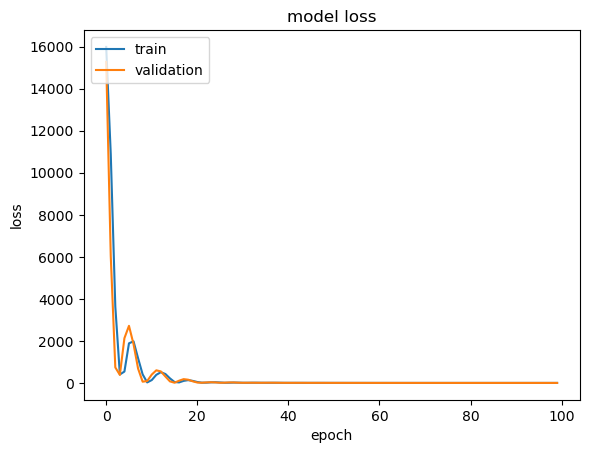

In [11]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
model.predict([[17,19,21,23,25,27,29,31]])

1/1 [==============================] - 0s 82ms/step


array([[33.16592]], dtype=float32)

In [13]:
model.evaluate(X_train,y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.0107


0.010659354738891125

In [14]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.0104


0.010380207560956478

In [28]:
import joblib
joblib.dump(filename="model.joblib",value='model')

['model.joblib']

In [19]:
def getter(l):
    y=model.predict([l])
    return(np.floor(y[0][0]))

In [20]:
getter([17,19,21,23,25,27,29,31])

1/1 [==============================] - 0s 33ms/step


33.0

In [22]:
getter([137,139,141,143,145,147,149,151])

1/1 [==============================] - 0s 32ms/step


153.0

In [24]:
getter([233,235,237,239,241,243,245,247])

1/1 [==============================] - 0s 40ms/step


249.0